# Exploration data analysis of avalanche accidents in France

In [1]:
# import of standard Python libraries for data analysis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#### Table of contents

<ul>
    <li><a href="#reading">1. Reading dataset and viewing general info</a></li>    
    <li><a href="#viz">2. Visualization</a></li>
        <ul>
            <li><a href="#viz_1">2.1 Visualization of most dangerous months for avalanche accidents and other time related info</a></li>  
            <li><a href="#viz_2">2.2 Visualization of most dangerous activities on mountains</a></li>
            <li><a href="#viz_3">2.3 Visualization of most dangerous group size when moving on mountains</a></li>
            <li><a href="#viz_4">2.4 Visualization of most dangerous altitude </a></li>
            <li><a href="#viz_5">2.5 Visualization of most dangerous time during the day</a></li>
        </ul>
    <li><a href="#french_alps">3. Focus only on massifs on French Alps</a></li>
        <ul>
            <li><a href="#alps_1">3.1 Import of data from shapefile for later geospatial visualization</a></li>
            <li><a href="#alps_2">3.2 Geospatial visualization with Bokeh</a></li>
        </ul>
</ul>

<a id='reading'></a>
## Reading dataset and viewing general info

In [2]:
# reading dataset based on open data from yearly ANENA reports 
# source: https://www.anena.org/5041-bilan-des-accidents.htm
file = '.\\accidents_massifs.xlsx'
df = pd.read_excel(file)
pd.set_option('display.max_columns', 500)
df.head()

,code accident,date,heure,département,commune,massif,region,massif_unique,site,coordonnées\nzone départ,altitude,inclinaison,orientation,groupe,emportés,ensevelis \ntête,décédés,blessées,indemnes,activité,activite_regrouped,évolution,BRA,qualité \nneige,cohésion\nneige,type \ndépart,cause départ,dénivelé\n(mètres),largeur \ncassure\n(mètres),épaisseur\ncassure max. \n(cm),Unnamed: 30
0,1011-74-02,2010-12-04,13:05,74,la clusaz,aravis,alps,Aravis,combe borderan,"6°28'30"""" 45°53'10''",2350.0,NaN,NO,3.0,3,1,0,3,0,randonnée,hiking,montée,NaN,sèche,tendre,linéaire,accidentelle tiers,400,50.0,100.0,NaN
1,1011-74-08,2010-12-26,10:55,74,le reposoir,aravis,alps,Aravis,col de l'encrenaz,NaN,1950.0,30-34,S,3.0,1,1,0,1,0,randonnée,hiking,montée,3,sèche,dure,linéaire,accidentelle soi-même,30,15.0,20.0,NaN
2,1011-74-11,2011-03-20,12:05,74,magland,aravis,alps,Aravis,face nord pointe d'Areu,32t 0312804 5094955,2430.0,35-39,NO,3.0,1,1,1,0,0,randonnée,hiking,descente,3,sèche,tendre,linéaire,accidentelle soi-même,500,350.0,40.0,NaN
3,1011-63-01,2010-11-28,14:00,63,le mont dore,sancy,other,other,puy redon / couloir de l'envers du redon,"45°31'58.0"" 2°48'23""",1725.0,40-44,NO,2.0,1,0,0,1,0,randonnée,hiking,descente,NaN,sèche,tendre,linéaire,accidentelle soi-même,200,NaN,NaN,NaN
4,1213-74-02,2012-12-06,12:45,74,serraval,aravis,alps,Aravis,sulens,32t 0295672 5078087,1710.0,40-44,O,2.0,2,1,1,0,1,randonnée,hiking,traversée,NaN,sèche,tendre,linéaire,accidentelle soi-même,50,100.0,40.0,NaN


In [3]:
# checking dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   code accident                  569 non-null    object        
 1   date                           569 non-null    datetime64[ns]
 2   heure                          373 non-null    object        
 3   département                    569 non-null    int64         
 4   commune                        569 non-null    object        
 5   massif                         569 non-null    object        
 6   region                         569 non-null    object        
 7   massif_unique                  569 non-null    object        
 8   site                           440 non-null    object        
 9   coordonnées
zone départ        239 non-null    object        
 10  altitude                       330 non-null    float64       
 11  inclinaison        

In [4]:
# viewing all column names
df.columns

Index(['code accident', 'date', 'heure', 'département', 'commune', 'massif',
       'region', 'massif_unique', 'site', 'coordonnées\nzone départ',
       'altitude', 'inclinaison', 'orientation', 'groupe', 'emportés',
       'ensevelis \ntête', 'décédés', 'blessées', 'indemnes', 'activité',
       'activite_regrouped', 'évolution', 'BRA', 'qualité \nneige',
       'cohésion\nneige', 'type \ndépart', 'cause départ',
       'dénivelé\n(mètres)', 'largeur \ncassure\n(mètres)',
       'épaisseur\ncassure max.  \n(cm)', 'Unnamed: 30'],
      dtype='object')

In [5]:
# removing dates out of range for my analysis
df = df[(df["date"]>"2010-9-30") & (df["date"]<"2019-10-01")]

<a id='viz'></a>
## Visualization
<a id='viz_1'></a>
### Visualization of most dangerous months for avalanche accidents and other time related info

In [6]:
# creating new variable by extracting month from date
df['month'] = df.date.dt.month

In [7]:
# creating dataframe with monthly data
df_monthly = df["month"].value_counts()
df_monthly = df_monthly.to_frame().reset_index()
df_monthly.head(6)

,index,month
0,3,136
1,2,116
2,1,104
3,12,75
4,4,54
5,5,18


In [8]:
# renaming columns and checking the result
df_monthly.columns = ['month', 'avalanche accidents count']
df_monthly.head(6)

,month,avalanche accidents count
0,3,136
1,2,116
2,1,104
3,12,75
4,4,54
5,5,18


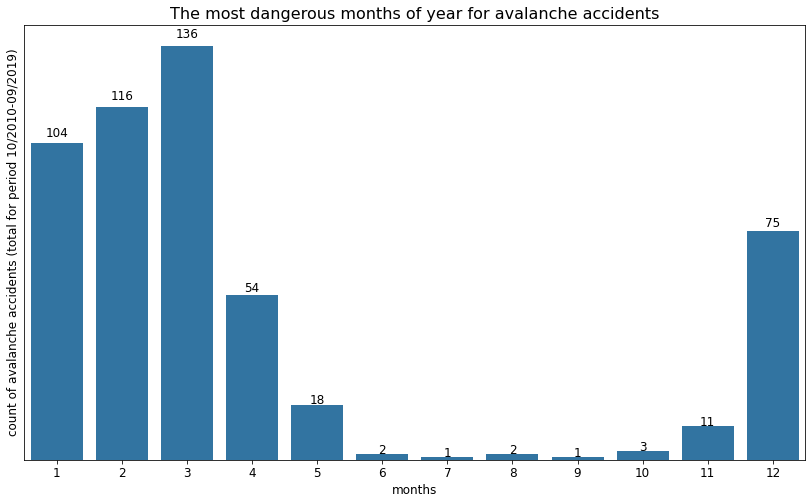

In [9]:
# final visualization of avalanche accidents by months
plt.figure(figsize=(14,8))
base_color = sns.color_palette()[0]
ax = sns.barplot(data=df_monthly, x='month', y='avalanche accidents count', color=base_color)
ax.set_xticklabels(ax.get_xticklabels(), fontsize=12)
ax.set(yticks=[])
plt.title('The most dangerous months of year for avalanche accidents', fontsize=16)
plt.xlabel('months', fontsize=12)
plt.ylabel('count of avalanche accidents (total for period 10/2010-09/2019)', fontsize=12)

for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height * 1.02,
            "{:,.0f}".format(height),
            ha="center", size=12)
    
plt.savefig('dangerous_months_accidents', bbox_inches='tight', dpi=600)
plt.show();

In [10]:
# checking distribution of avalanche accidents by year
# we have to bear in mind that years 2010 and 2019 are not fully represented in my dataset
df['year'] = df.date.dt.year
df['year'].value_counts()

2018    82
2013    74
2014    55
2015    54
2017    53
2019    52
2016    50
2012    43
2011    39
2010    21
Name: year, dtype: int64

In [11]:
# creating list of summer months
summer = [7, 8, 9]

In [12]:
# checking all records for summer avalanches
df[df["month"].isin(summer)]

,code accident,date,heure,département,commune,massif,region,massif_unique,site,coordonnées\nzone départ,altitude,inclinaison,orientation,groupe,emportés,ensevelis \ntête,décédés,blessées,indemnes,activité,activite_regrouped,évolution,BRA,qualité \nneige,cohésion\nneige,type \ndépart,cause départ,dénivelé\n(mètres),largeur \ncassure\n(mètres),épaisseur\ncassure max. \n(cm),Unnamed: 30,month,year
300,1112-74-09,2012-07-12,05:20,74,chamonix,mont blanc,alps,Mont-Blanc,mont maudit,32t 0334992 5079521,4200.0,40-44,N,23.0,23,9,9,0,0,alpinisme,alpinisme,montée,NaN,sèche,dure,linéaire,naturelle sérac/corniche,200,NaN,NaN,NaN,7,2012
306,1213-74-12,2013-08-13,03:50,74,chamonix,mont blanc,alps,Mont-Blanc,face nord tacul,NaN,4300.0,40-44,N,6.0,3,2,2,0,1,alpinisme,alpinisme,montée,NaN,sèche,dure,linéaire,naturelle sérac/corniche,250,NaN,NaN,NaN,8,2013
317,1415-74-11,2015-08-25,08:40,74,chamonix,mont blanc,alps,Mont-Blanc,face nord goûter,NaN,NaN,NaN,NaN,3.0,2,0,0,0,0,alpinisme,alpinisme,à pieds,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8,2015
405,1415-05-12,2015-09-15,11:45,5,pelvoux,pelvoux,alps,Pelvoux,dome de neige des Ecrins,"44°55'23.2"" / 6°21'30.7""",3965.0,40-44,N,8.0,8,5,1,4,0,alpinisme,alpinisme,à pieds,traversée,NaN,humide,dure,linéaire,accidentelle soi-même,220.0,250.0,200.0,9,2015


<a id='viz_2'></a>
### Visualization of most dangerous activities on mountains

In [13]:
# creating dataframe with data for activities
df_activity = df.activite_regrouped.value_counts()
df_activity = df_activity.to_frame().reset_index()
df_activity.head(6)

,index,activite_regrouped
0,hiking,230
1,"off-piste (ski, snowboard)",195
2,"cross-country (ski, snowboard etc.)",40
3,alpinisme,30
4,other,20
5,"piste (ski, snowboard)",8


In [14]:
# renaming columns
df_activity.columns = ['activity', 'avalanche accidents count']
df_activity.head(6)

,activity,avalanche accidents count
0,hiking,230
1,"off-piste (ski, snowboard)",195
2,"cross-country (ski, snowboard etc.)",40
3,alpinisme,30
4,other,20
5,"piste (ski, snowboard)",8


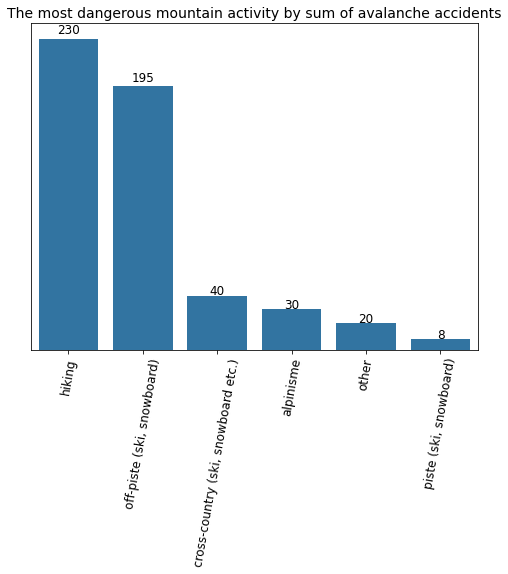

In [15]:
# final visualization of avalanche accidents by activity
plt.figure(figsize=(8,6))
base_color = sns.color_palette()[0]
ax = sns.barplot(data=df_activity, x='activity', y='avalanche accidents count', color=base_color)
ax.set_xticklabels(ax.get_xticklabels(), rotation=80, fontsize=12, horizontalalignment='center')
ax.set(yticks=[])
plt.title('The most dangerous mountain activity by sum of avalanche accidents', fontsize=14)
plt.xlabel('')
plt.ylabel('')

for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height * 1.02,
            "{:,.0f}".format(height),
            ha="center", size=12)
    
plt.savefig('dangerous_activity_accidents', bbox_inches='tight', dpi=600)
plt.show();

In [16]:
# checking avalanche accidents by different massifs
df.massif_unique.value_counts()

Vanoise       71
Hte-tarent    54
Mont-Blanc    43
Hte-maurie    33
Queyras       29
Pelvoux       26
Chablais      25
Oisans        23
Aravis        21
hte-bigo      20
Belledone     18
Maurienne     18
other         14
Gdes-rouss    14
Chartreuse    13
Beaufortin    13
Mercantour    11
Thabor        10
Ubaye         10
Vercors        8
Parpaillon     8
Champsaur      8
Bauges         8
hte-ariege     5
luchonnais     5
capcir         4
aspe-ossau     3
Devoluy        2
Ht_Var-Ver     2
couseran       2
cerdagne       1
aure_lour      1
Name: massif_unique, dtype: int64

In [17]:
# correcting typo in massif name
df.loc[df.massif_unique=="Belledone", 'massif_unique']="Belledonne"

In [18]:
# checking distribution of avalanche accidents in different regions
df.region.value_counts()

alps        468
pyrenees     41
other        14
Name: region, dtype: int64

<a id='viz_3'></a>
### Visualization of most dangerous group size when moving on mountains

In [19]:
# checking value counts for group size
df.groupe.value_counts()

2.0     142
3.0      79
1.0      72
4.0      52
5.0      21
6.0      18
7.0      15
9.0       7
8.0       7
15.0      5
11.0      4
10.0      3
12.0      3
50.0      1
18.0      1
13.0      1
33.0      1
19.0      1
22.0      1
23.0      1
14.0      1
20.0      1
52.0      1
Name: groupe, dtype: int64

In [20]:
# removing nans from groupe variables and changing data type from float to integer
df.groupe = df.groupe.fillna(0)
df.groupe = df.groupe.astype(int)

In [21]:
# regrouping values for group size variables
df['groupe_edited'] = df.groupe.apply(lambda x:
                                     None if x == 0
                                     else 1 if x == 1
                                     else 2 if x == 2
                                     else 3 if x == 3
                                    else 4 if x == 4
                                    else 5 if x == 5
                                    else 6 if x == 6
                                    else 7 if x == 7
                                    else "8-10" if (x>7) & (x<11)
                                    else "11-14" if (x>10) & (x<15)
                                    else "more than 15")                                 

In [22]:
# new dataframe for group size
avalanche_group = (df.groupe_edited.value_counts()).to_frame().reset_index()
avalanche_group.columns = ['size_of_group', 'sum_of_avalanche_accidents']
avalanche_group

,size_of_group,sum_of_avalanche_accidents
0,2,142
1,3,79
2,1,72
3,4,52
4,5,21
5,6,18
6,8-10,17
7,7,15
8,more than 15,13
9,11-14,9


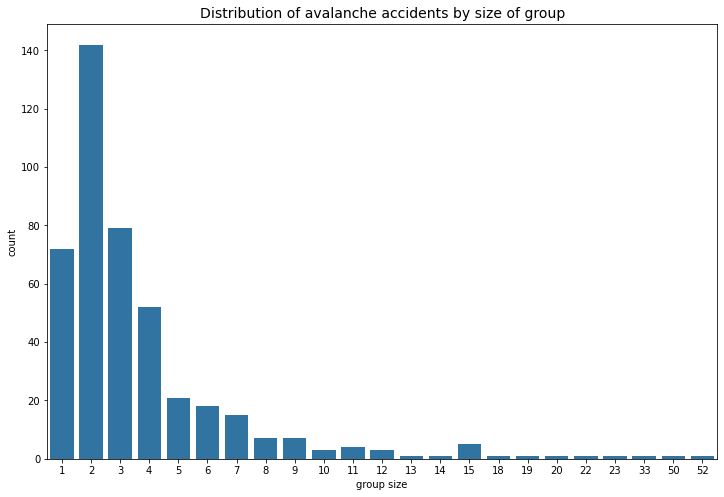

In [23]:
# final visualization of avalanche accidents by group size
df_group = df[df["groupe"]>0]

base_color = sns.color_palette()[0]
plt.figure(figsize=(12,8))
ax = sns.countplot(data=df_group, x='groupe', color=base_color)
ax.grid(False)
plt.title("Distribution of avalanche accidents by size of group", fontsize=14)
plt.xlabel("group size")
plt.ylabel("count")
plt.savefig('dangerous_group_size_accidents', bbox_inches='tight', dpi=600)
plt.show();

<a id='viz_4'></a>
### Visualization of most dangerous altitude

In [24]:
# checking most dangerous altitudes
df.altitude.value_counts()

2300.0    16
2600.0    13
2400.0    13
2200.0     9
2550.0     9
          ..
2747.0     1
1930.0     1
1550.0     1
3300.0     1
4300.0     1
Name: altitude, Length: 147, dtype: int64

In [25]:
# looking for lowest altitude and getting further insight about different values
np.sort(df.altitude.unique())

array([1000., 1210., 1225., 1244., 1270., 1300., 1400., 1490., 1530.,
       1540., 1550., 1570., 1600., 1670., 1680., 1690., 1700., 1710.,
       1725., 1750., 1774., 1780., 1790., 1800., 1825., 1830., 1840.,
       1850., 1870., 1880., 1890., 1900., 1910., 1930., 1950., 1960.,
       1970., 1975., 1980., 1990., 2000., 2005., 2015., 2030., 2035.,
       2040., 2050., 2060., 2070., 2100., 2120., 2150., 2165., 2170.,
       2175., 2190., 2200., 2205., 2230., 2240., 2245., 2250., 2251.,
       2255., 2270., 2280., 2290., 2300., 2315., 2320., 2330., 2340.,
       2350., 2360., 2370., 2375., 2400., 2410., 2430., 2440., 2450.,
       2460., 2480., 2490., 2500., 2510., 2520., 2530., 2540., 2550.,
       2560., 2565., 2570., 2580., 2600., 2610., 2635., 2650., 2660.,
       2680., 2690., 2700., 2720., 2730., 2740., 2747., 2750., 2755.,
       2770., 2800., 2820., 2830., 2840., 2850., 2865., 2880., 2890.,
       2900., 2950., 2980., 2990., 3000., 3040., 3050., 3100., 3140.,
       3150., 3200.,

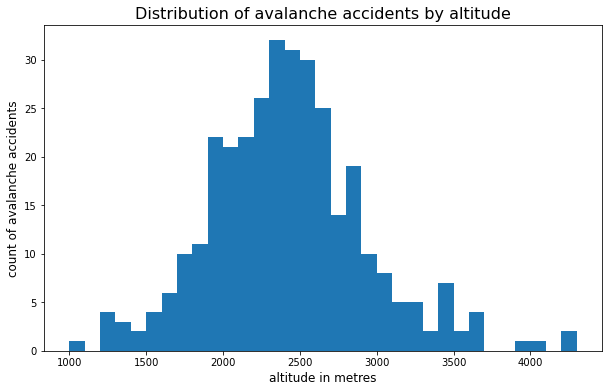

In [26]:
# final visualization for avalanche accidents by altitudes
binsize = 100
bins = np.arange(1000, df.altitude.max()+binsize, binsize)
plt.figure(figsize=(10,6))
plt.hist(data=df, x='altitude', bins=bins, color=base_color)
plt.title("Distribution of avalanche accidents by altitude", fontsize=16)
plt.xlabel("altitude in metres", fontsize=12)
plt.ylabel("count of avalanche accidents", fontsize=12)
plt.savefig('dangerous_altitude_accidents', bbox_inches='tight', dpi=600)
plt.show();

In [27]:
# removing nans and changing data type from float to integer
df.altitude = df.altitude.fillna(0)
df.altitude = df.altitude.astype(int)

In [28]:
# regrouping of altitude values
df['altitude_edited'] = df.altitude.apply(lambda x:
                                     None if x < 1000
                                    else "1000-1499" if x < 1500
                                    else "1500-1999" if x < 2000
                                    else "2000-2499" if x < 2500
                                    else "2500-2999" if x < 3000
                                    else "3000-3499" if x < 3500
                                    else "3500-3999" if x < 4000
                                   else "4000+")

In [29]:
# checking results for regrouped altitude values
df.altitude_edited.value_counts()

2000-2499    132
2500-2999     98
1500-1999     53
3000-3499     27
1000-1499     10
3500-3999      7
4000+          3
Name: altitude_edited, dtype: int64

<a id='viz_5'></a>
### Visualization of most dangerous time during the day

In [30]:
# checking values for hour of accidents
df.heure.value_counts()

11:00    14
13:00    13
12:00    13
14:00    12
11:30    12
         ..
18:00     1
14:55     1
12:37     1
11:05     1
12:44     1
Name: heure, Length: 116, dtype: int64

In [31]:
# checking data type of hour variable
np.dtype(df.heure)

dtype('O')

In [32]:
# changing data type to datetime for easier handling of variable
import datetime as dt
df['hour_of_day'] = (pd.to_datetime(df.heure)).dt.hour

In [33]:
# viewing all unique values
df["hour_of_day"].unique()

array([13., 10., 12., 14., 15., 11., 16.,  9., nan, 17.,  8., 18.,  5.,
        3., 20., 19.])

In [34]:
# creating new dataframe to store hourly data
hour_df = df[df["hour_of_day"]>0]

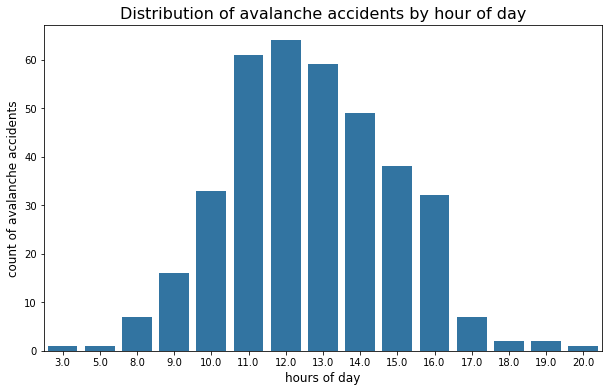

In [35]:
# final visualization of most dangerous hour of day for avalanche accidents
base_color = sns.color_palette()[0]
plt.figure(figsize=(10,6))
ax = sns.countplot(data=hour_df, x='hour_of_day', color=base_color)
plt.title("Distribution of avalanche accidents by hour of day", fontsize=16)
plt.xlabel("hours of day", fontsize=12)
plt.ylabel("count of avalanche accidents", fontsize=12)
plt.savefig('dangerous_hours_of_day_accidents', bbox_inches='tight', dpi=600)
plt.show()
ax.grid(False)

In [36]:
# displaying info for other variables
df.évolution.value_counts()

ski               238
descente           94
montée             36
à pieds            28
traversée          19
raquettes          11
snowboard           9
véhicule route      2
ski fond            1
arrêt               1
Name: évolution, dtype: int64

In [37]:
df["qualité \nneige"].value_counts()

sèche     116
3         106
2          34
4          34
humide     21
5           1
1           1
Name: qualité \nneige, dtype: int64

In [38]:
df["cohésion\nneige"].value_counts()

sèche     183
tendre     85
humide     39
dure       38
Name: cohésion\nneige, dtype: int64

In [39]:
df["cause départ"].value_counts()

linéaire                    264
accidentelle soi-même       125
naturelle                    14
accidentelle tiers            7
ponctuel                      3
naturelle sérac/corniche      3
Name: cause départ, dtype: int64

<a id='french_alps'></a>
## Focus only on massifs on French Alps

In [40]:
# selecting only data for French Alps
df_alps = df[df["region"]=="alps"]

In [41]:
df_alps.head()

,code accident,date,heure,département,commune,massif,region,massif_unique,site,coordonnées\nzone départ,altitude,inclinaison,orientation,groupe,emportés,ensevelis \ntête,décédés,blessées,indemnes,activité,activite_regrouped,évolution,BRA,qualité \nneige,cohésion\nneige,type \ndépart,cause départ,dénivelé\n(mètres),largeur \ncassure\n(mètres),épaisseur\ncassure max. \n(cm),Unnamed: 30,month,year,groupe_edited,altitude_edited,hour_of_day
0,1011-74-02,2010-12-04,13:05,74,la clusaz,aravis,alps,Aravis,combe borderan,"6°28'30"""" 45°53'10''",2350,NaN,NO,3,3,1,0,3,0,randonnée,hiking,montée,NaN,sèche,tendre,linéaire,accidentelle tiers,400,50.0,100.0,NaN,12,2010,3,2000-2499,13.0
1,1011-74-08,2010-12-26,10:55,74,le reposoir,aravis,alps,Aravis,col de l'encrenaz,NaN,1950,30-34,S,3,1,1,0,1,0,randonnée,hiking,montée,3,sèche,dure,linéaire,accidentelle soi-même,30,15.0,20.0,NaN,12,2010,3,1500-1999,10.0
2,1011-74-11,2011-03-20,12:05,74,magland,aravis,alps,Aravis,face nord pointe d'Areu,32t 0312804 5094955,2430,35-39,NO,3,1,1,1,0,0,randonnée,hiking,descente,3,sèche,tendre,linéaire,accidentelle soi-même,500,350.0,40.0,NaN,3,2011,3,2000-2499,12.0
4,1213-74-02,2012-12-06,12:45,74,serraval,aravis,alps,Aravis,sulens,32t 0295672 5078087,1710,40-44,O,2,2,1,1,0,1,randonnée,hiking,traversée,NaN,sèche,tendre,linéaire,accidentelle soi-même,50,100.0,40.0,NaN,12,2012,2,1500-1999,12.0
5,1314-74-03,2013-12-27,10:45,74,la clusaz,aravis,alps,Aravis,combe de torchere,"45°53'25"" / 6°29'15""",2375,30-34,NO,3,2,2,2,0,0,hors-piste,"off-piste (ski, snowboard)",ski,descente,4,sèche,tendre,linéaire,accidentelle soi-même,125.0,115.0,100.0,12,2013,3,2000-2499,10.0


In [42]:
# creating new dataframe for sum of avalanche accidents in different massifs of French Alps
df_alps_sum_aval = df_alps[["massif_unique", "code accident"]]

In [43]:
df_alps_sum_aval = df_alps_sum_aval.groupby("massif_unique").count().reset_index().sort_values(by="code accident", ascending=False)
df_alps_sum_aval.columns=["massif","sum_of_avalanches"]
df_alps_sum_aval

,massif,sum_of_avalanches
21,Vanoise,71
11,Hte-tarent,54
14,Mont-Blanc,43
10,Hte-maurie,33
18,Queyras,29
17,Pelvoux,26
4,Chablais,25
15,Oisans,23
0,Aravis,21
12,Maurienne,18


In [44]:
# checking total number of avalanche accidents in French Alps
df_alps_sum_aval.sum_of_avalanches.sum()

468

<a id='alps_1'></a>
## Import of data from shapefile for later geospatial visualization

In [45]:
# importing Geopandas library for handling geospatial data
import geopandas as gpd

# reading shapefile of massifs in french Alps
gdf_alps = gpd.read_file(r".\\shapefile\\massifs_alpes_2154.shp")

In [46]:
# merge of shapefile and data with sum of avalanche accidents
aval_accidents_viz = pd.merge(gdf_alps, df_alps_sum_aval, how="left", left_on="nom_reduit", right_on="massif")

In [47]:
# checking nez dataframe
aval_accidents_viz

,massif_num,nom,nom_reduit,superficie,perimetre,geometry,massif,sum_of_avalanches
0,1,Chablais,Chablais,1385.316376,170.748079,"POLYGON ((999869.605 6556953.256, 999013.523 6...",Chablais,25
1,2,Aravis,Aravis,1073.660018,129.974582,"POLYGON ((976925.610 6556341.034, 978673.707 6...",Aravis,21
2,3,Mont-Blanc,Mont-Blanc,585.532682,125.642640,"POLYGON ((995389.567 6528045.104, 994136.335 6...",Mont-Blanc,43
3,4,Bauges,Bauges,872.270863,122.259312,"POLYGON ((946630.789 6532687.729, 947533.532 6...",Bauges,8
4,5,Beaufortin,Beaufortin,755.453226,116.226856,"POLYGON ((990566.082 6523570.533, 990407.893 6...",Beaufortin,13
5,6,Haute-Tarentaise,Hte-tarent,642.066618,141.562943,"POLYGON ((1018903.144 6493855.250, 1018430.597...",Hte-tarent,54
6,10,Vanoise,Vanoise,1218.452875,170.747060,"POLYGON ((991482.725 6503181.795, 993104.466 6...",Vanoise,71
7,9,Maurienne,Maurienne,917.119330,172.057111,"POLYGON ((983410.901 6466547.737, 983726.454 6...",Maurienne,18
8,7,Chartreuse,Chartreuse,846.994238,120.161035,"POLYGON ((934227.542 6488155.490, 934469.883 6...",Chartreuse,13
9,8,Belledonne,Belledonne,993.456150,154.882390,"POLYGON ((950810.720 6469559.152, 949675.761 6...",Belledonne,18


In [48]:
# displaying general infor about new dataframe
aval_accidents_viz.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 23 entries, 0 to 22
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   massif_num         23 non-null     int64   
 1   nom                23 non-null     object  
 2   nom_reduit         23 non-null     object  
 3   superficie         23 non-null     float64 
 4   perimetre          23 non-null     float64 
 5   geometry           23 non-null     geometry
 6   massif             23 non-null     object  
 7   sum_of_avalanches  23 non-null     int64   
dtypes: float64(2), geometry(1), int64(2), object(3)
memory usage: 1.6+ KB


In [49]:
# verifying names of massifs
aval_accidents_viz.nom.unique()

array(['Chablais', 'Aravis', 'Mont-Blanc', 'Bauges', 'Beaufortin',
       'Haute-Tarentaise', 'Vanoise', 'Maurienne', 'Chartreuse',
       'Belledonne', 'Grandes-Rousses', 'Oisans', 'Vercors', 'Devoluy',
       'Champsaur', 'Pelvoux', 'Haute-Maurienne', 'Thabor', 'Queyras',
       'Parpaillon', 'Ubaye', 'Haut_Var-Haut_Verdon', 'Mercantour'],
      dtype=object)

<a id='alps_2'></a>
## Geospatial visualization with Bokeh

In [50]:
# importing objects from Bokeh library for further use for visualization
from bokeh.io import save, output_notebook
from bokeh.models import (ColorBar,
                          GeoJSONDataSource, HoverTool,
                          LinearColorMapper)
from bokeh.palettes import brewer
from bokeh.plotting import figure, output_file, show

In [51]:
# importing json because geosource has to be in format of JSON
import json
geosource = GeoJSONDataSource(geojson = aval_accidents_viz.to_json())

In [52]:
# define color palettes
palette = brewer['YlGnBu'][9]
palette = palette[::-1] # reverse order of colors so higher values have darker colors

# instantiate LinearColorMapper that linearly maps numbers in a range into a sequence of colors
# and nan values will be colored in grey
color_mapper = LinearColorMapper(palette = palette, low = 2, high = 71, nan_color = '#d9d9d9')

# create color bar
color_bar = ColorBar(color_mapper = color_mapper, 
                     label_standoff = 8,
                     width = 400, height = 20,
                     border_line_color = None,
                     location = (0,0), 
                     orientation = 'horizontal',)

In [53]:
# create figure object
p = figure(title = 'Avalanche accidents from 10/2010 till 09/2019 in massifs of french Alps', 
           plot_height = 700,
           plot_width = 500, 
           toolbar_location = 'below',
           tools = 'pan, wheel_zoom, box_zoom, reset')

p.xgrid.grid_line_color = None
p.ygrid.grid_line_color = None

In [54]:
# add patch renderer to figure
massifs = p.patches('xs','ys', source = geosource,
                   fill_color = {'field' :'sum_of_avalanches',
                                 'transform' : color_mapper},
                   line_color = 'gray', 
                   line_width = 0.20, 
                   fill_alpha = 1)

In [55]:
# create hover tool
p.add_tools(HoverTool(renderers = [massifs],
                      tooltips = [('massif','@nom'),
                                ('sum_of_avalanches','@sum_of_avalanches')]))

p.add_layout(color_bar, 'below')

In [56]:
# final visualization can be seen as html page
output_notebook()
show(p)

Loading BokehJS ...

In [57]:
# creating new color mapper in order to compare color scale with avalanche events which have max 210
color_mapper_2 = LinearColorMapper(palette = palette, low = 2, high = 210, nan_color = '#d9d9d9')

color_bar = ColorBar(color_mapper = color_mapper_2, 
                     label_standoff = 8,
                     width = 400, height = 20,
                     border_line_color = None,
                     location = (0,0), 
                     orientation = 'horizontal',)

p_2 = figure(title = 'Avalanche accidents from 10/2010 till 09/2019 in massifs of french Alps', 
           plot_height = 700,
           plot_width = 500, 
           toolbar_location = 'below',
           tools = 'pan, wheel_zoom, box_zoom, reset')

p_2.xgrid.grid_line_color = None
p_2.ygrid.grid_line_color = None

# add patch renderer to figure
massifs = p_2.patches('xs','ys', source = geosource,
                   fill_color = {'field' :'sum_of_avalanches',
                                 'transform' : color_mapper_2},
                   line_color = 'gray', 
                   line_width = 0.20, 
                   fill_alpha = 1)

p_2.add_tools(HoverTool(renderers = [massifs],
                      tooltips = [('massif','@nom'),
                                ('sum_of_avalanches','@sum_of_avalanches')]))

p_2.add_layout(color_bar, 'below')


output_notebook()
show(p_2)

Loading BokehJS ...